**<span style="font-size: 25px;">AEROFIT CASE STUDY</span>**

**<span style="font-size: 18px;">DATA FIELDS</span>**

● **Product**: Product Purchased KP281, KP481, or KP781

● **Age**: In years

● **Gender**: Male/Female

● **Education**: in years

● **MaritalStatus**: single or partnered

● **Usage**: average number of times the customer plans to use the treadmill each week

● **Income**: annual income (in $

● **Fitness**: self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is the

excellent shape

● **Miles**: average number of miles the customer expects to walk/run each week


**<span style="font-size: 18px;">Problem Statement</span>**

***--> The company wants to identify the characteristics of the target audience for each type of treadmill offered, to provide a better recommendation of the treadmills to new customers***

***--> to check whether there are any differences across the product with respect to customer characteristics.***

***-->  to create a customer profile for each AeroFit treadmill.***

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [38]:
df.shape

(180, 9)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


***--> There are 8 columns out of which 6 columns **['Age','Education','Usage', 'Fitness', 'Income', 'Miles']** are of integer dtypes and rest are object dtypes.***

***--> Object dtype **['Product', 'Gender', 'MaritalStatus']** to be converted to category dtype.***

***--> There are no null values in any of the columns***

***Converting columns of object dtype to category***

In [292]:
to_convert_col_dtypes = ['Product','Gender','MaritalStatus']

for i in to_convert_col_dtypes:
    df[i] = df[i].astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


***Checking outliers***

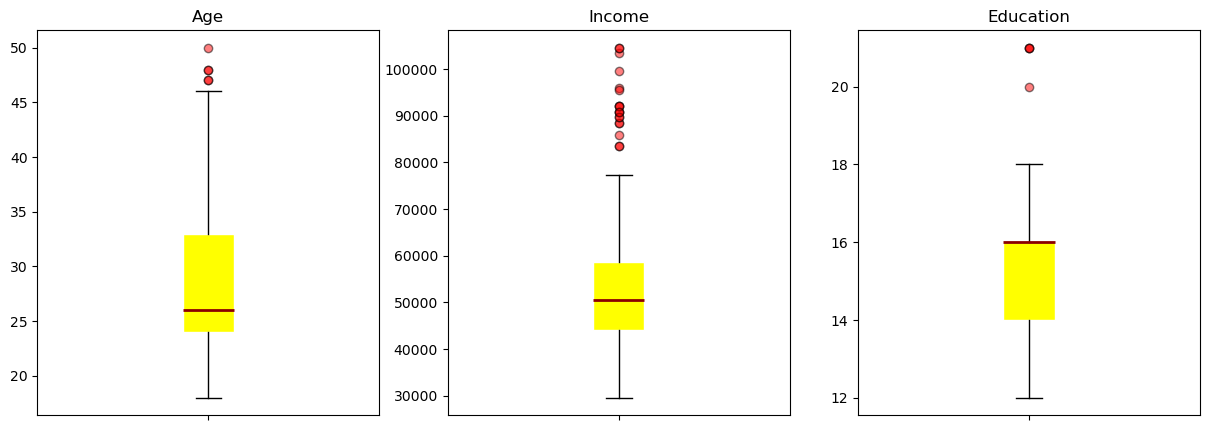

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

box_props = dict(facecolor='yellow', color='white')
median_props = dict(color='darkred', linewidth=2)

ax1.boxplot(df['Age'],
           patch_artist=True,
           boxprops=box_props,
           medianprops=median_props,
           flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))
ax1.set_title('Age')
ax1.set_xticklabels([])

ax2.boxplot(df['Income'],
           patch_artist=True,
           boxprops=box_props,
           medianprops=median_props,
           flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))
ax2.set_title('Income')
ax2.set_xticklabels([])

ax3.boxplot(df['Education'],
           patch_artist=True,
           boxprops=box_props,
           medianprops=median_props,
           flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))
ax3.set_title('Education')
ax3.set_xticklabels([])

plt.show()

***Checking Skewness***

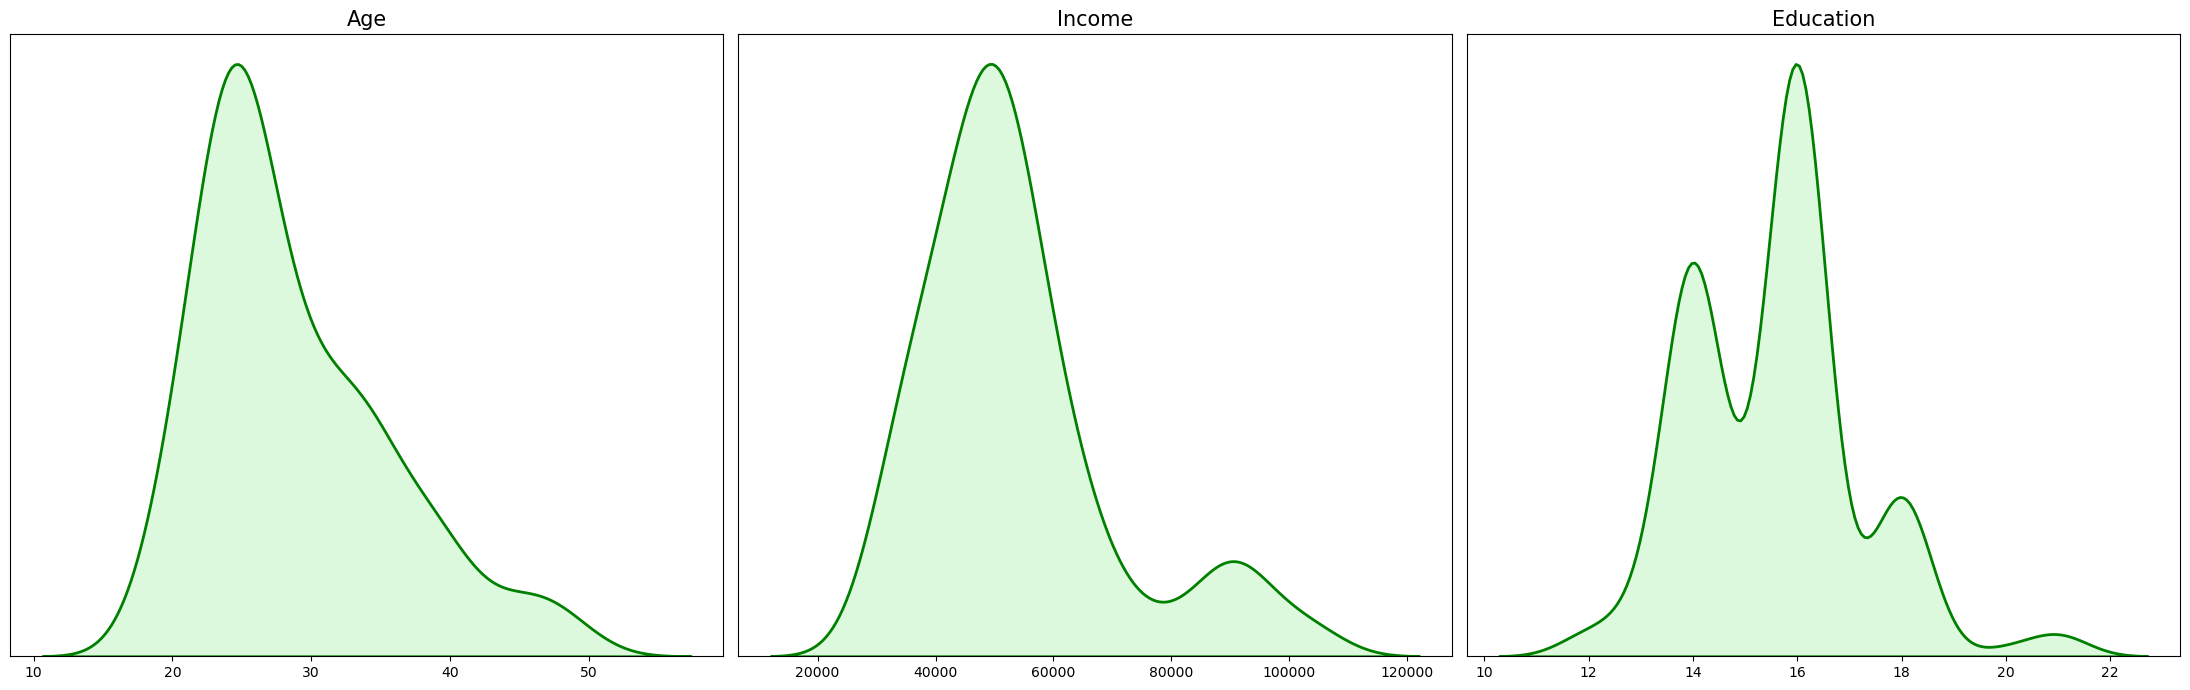

In [43]:
columns= ['Age','Income','Education']

fig, axs = plt.subplots(1, 3, figsize=(22, 7))
for i, col_name in enumerate(columns):  
    sns.kdeplot(df[col_name],color = 'lightgreen',fill=True,alpha=0.3,ax=axs[i],ec='green',lw=2)
    axs[i].set_title(col_name,size=15)
    axs[i].set(
                xlabel=None,    
                yticklabels=[], 
                yticks=[],     
                ylabel=None     
              )
plt.tight_layout()
plt.show()

***--> Age and Income data are right skewed---> 50% of the data is concentrated towards left at a smaller area.***

***--> The long upper whisker of age data suggests a larger spread of data towards right side.***

***--> Income data has many outliers on the upper part- suggests many high income individuals are customers.***

***clipping the data to reduce the influence of extreme outliers in statistical analysis***. 

In [100]:
cols_to_clip = ['Age', 'Income','Education']

for col in cols_to_clip:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = df[col].clip(lower=lower_bound,upper=upper_bound)


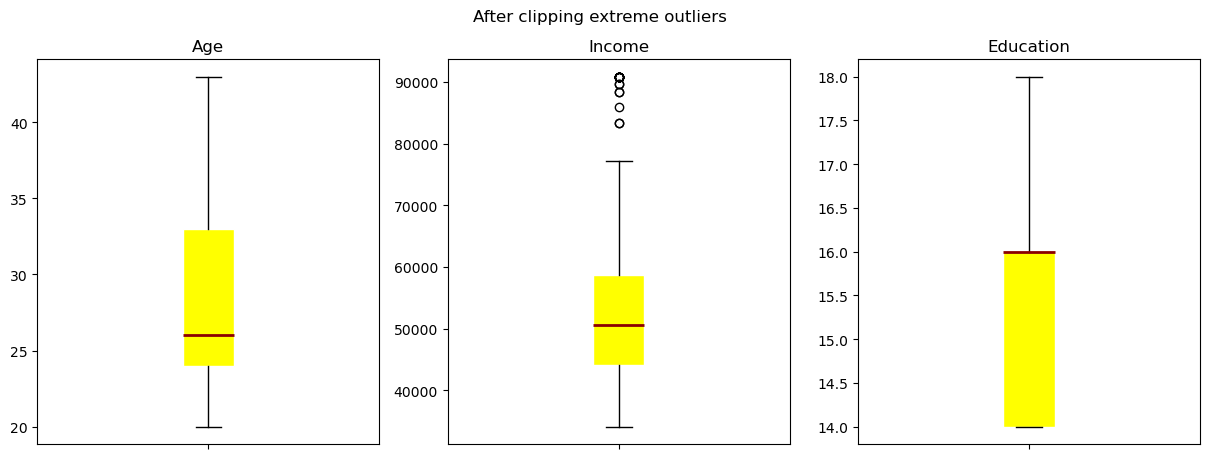

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

box_props = dict(facecolor='yellow', color='white', linewidth=1)
median_props = dict(color='darkred', linewidth=2)

ax1.boxplot(df['Age'],
           patch_artist=True,
           boxprops=box_props,
           medianprops=median_props)
ax1.set_title('Age')
ax1.set_xticklabels([])

ax2.boxplot(df['Income'],
           patch_artist=True,
           boxprops=box_props,
           medianprops=median_props)
ax2.set_title('Income')
ax2.set_xticklabels([])

ax3.boxplot(df['Education'],
           patch_artist=True,
           boxprops=box_props,
           medianprops=median_props)
ax3.set_title('Education')
ax3.set_xticklabels([])

plt.suptitle('After clipping extreme outliers')
plt.show()

**<span style="font-size: 23px;">UNIVARIATE ANALYSIS</span>**

**Product**

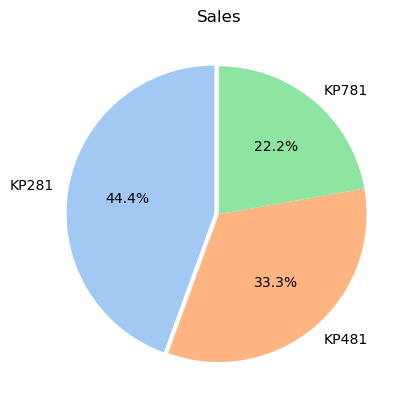

In [102]:
product_count = df['Product'].value_counts()
explode = (0.03, 0, 0)
colors = sns.color_palette('pastel')[0:len(product_count.index)]
plt.pie(product_count, labels = product_count.index,autopct='%1.1f%%',startangle=90, colors=colors,explode=explode)
plt.title("Sales")
plt.show()

***--> KP 281 which is the cheapest treadmill contributed 44.4% of the sales in terms of volume***  (***Low Price, Low Margin, High Volume***)

***--> KP 781 the most expensive one contributed least in the sales in terms of volume***  (***High Price, High Margin, Low Volume***)

**Age**

In [103]:
age_counts = df['Age'].value_counts().sort_index()
age_counts

Age
20    10
21     7
22     7
23    18
24    12
25    25
26    12
27     7
28     9
29     6
30     7
31     6
32     4
33     8
34     6
35     8
36     1
37     2
38     7
39     1
40     5
41     1
42     1
43    10
Name: count, dtype: int64

In [104]:
df[['Age']].describe().drop('count')

,Age
mean,28.638889
std,6.440760
min,20.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,43.000000


***--> difference between mean and median is very less suggesting there are no extreme values or outliers.***

***--> minimum age of customers - 20, maximum age- 43***

***--> 50% of the customers belongs to 20-26 age group and remaining 50% customers belongs to 26-43 age group***

***--> standard deviation is 6.44 which suggests that 68% of customers belongs to 22-34 age group.***

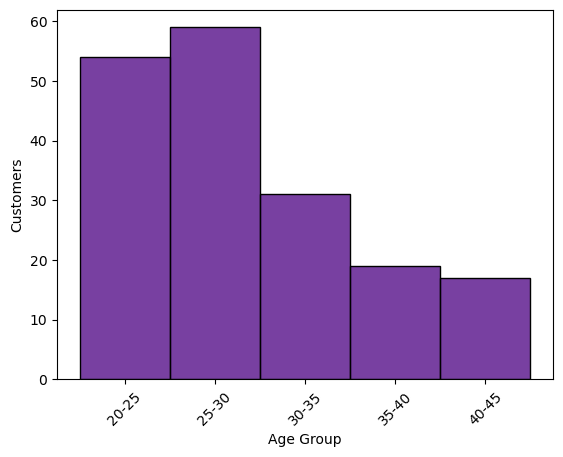

In [105]:
bins = [20, 25, 30, 35, 40, 45]
labels = ['20-25', '25-30', '30-35', '35-40', '40-45']

#creating a column- Age Group
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels,right=False)
sns.histplot(data=df, x='Age Group', color='indigo', fill=True)
plt.ylabel('Customers')
plt.xticks(rotation=45)

plt.show()

***--> maximum customers belongs to 25-30 age group***

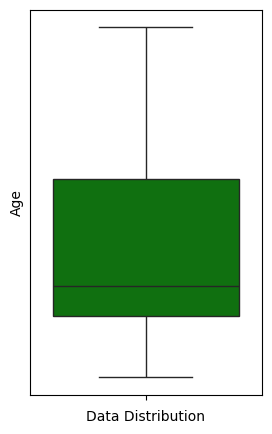

In [106]:
plt.figure(figsize=(3,5))
sns.boxplot(df['Age'],orient='v',color='green')
plt.yticks([])
plt.ylabel('Age')
plt.xlabel("Data Distribution")
plt.show()

In [107]:
df['Age'] = df['Age'].astype(int) 

**Gender**

In [108]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Male      104
Female     76
Name: count, dtype: int64

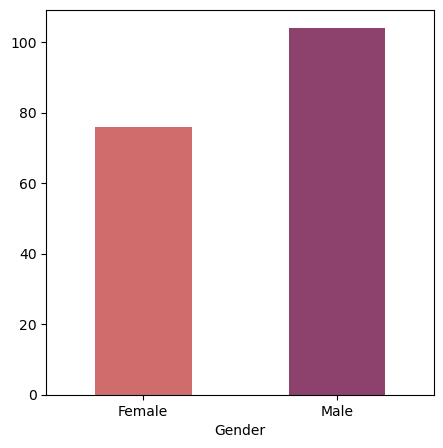

In [110]:
plt.figure(figsize=(5,5))
sns.barplot(x=gender_counts.index, y=gender_counts.values,hue=gender_counts.index,legend=False,palette="flare",width=0.5)
plt.show()

***-->  male - 57%***

***--> female - 43%***

**Education**

In [111]:
education_counts = df['Education'].value_counts().sort_index()
education_counts

Education
14    63
15     5
16    85
18    27
Name: count, dtype: int64

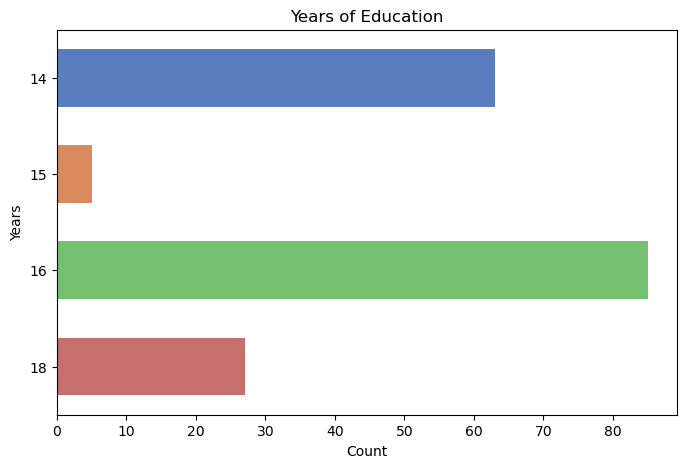

In [112]:
plt.figure(figsize=(8,5))
# colors = sns.color_palette('pastel')[0:len(education_counts.index)]
ax =sns.barplot(
                x=education_counts.values, 
                y=education_counts.index, 
                hue =education_counts.index, 
                orient='h',legend=False,
                palette='muted',
                width=0.6)
ax.set_title('Years of Education')
ax.set_xlabel('Count')    
ax.set_ylabel('Years') 

plt.show()

***--> Most of the customers are having 16 years of education (***4 years Graduation***)***

***--> Next to it is customers with 14 years of education (***Undergraduates***)***

***--> Also there are 15 % customers with 18 years of education (***Masters***)***

**Marital Status**

In [113]:
maritalstatus_count = df['MaritalStatus'].value_counts()
maritalstatus_count 

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

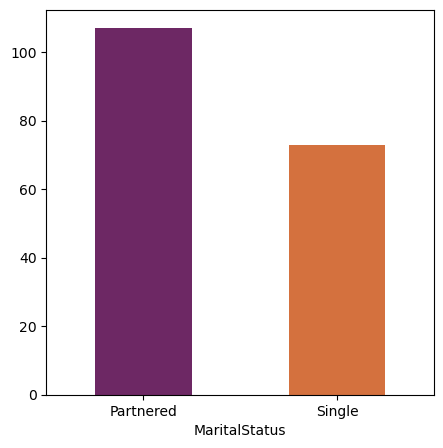

In [114]:
plt.figure(figsize=(5,5))
sns.barplot(x=maritalstatus_count.index, y=maritalstatus_count.values,hue=maritalstatus_count.index,legend=False,palette="inferno",width=0.5)
plt.show()

***--> Around around 60% of the customers are partnered (married or in a relationship)***

**Usage**

In [115]:
usage_count = df['Usage'].value_counts()
usage_count

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

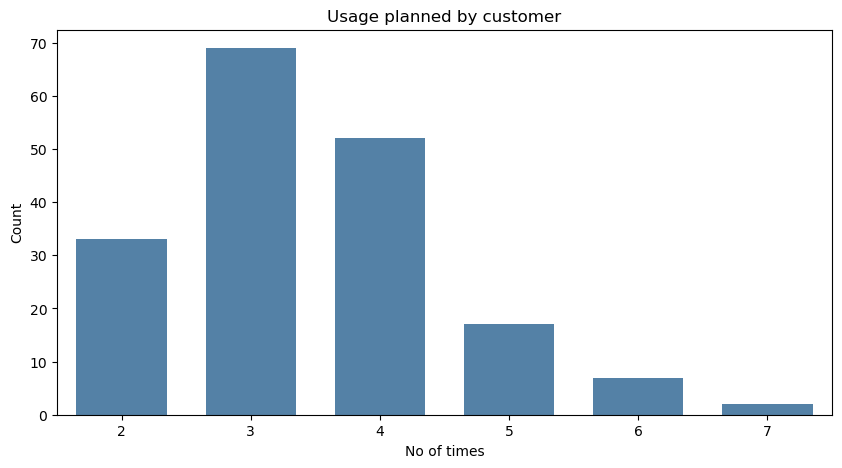

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(x=usage_count.index, y=usage_count.values, legend=False, color = 'steelblue' ,width=0.7)
plt.title("Usage planned by customer")
plt.xlabel('No of times')
plt.ylabel('Count')
plt.show()

***--> Most of the customers (around 70%) are planning to use the treadmill for an average of 3 or 4 times in a week.***

**Income**

In [117]:
income_data = df['Income'].astype('int')

In [118]:
df['Income'].describe().drop('count')

mean    53476.800675
std     15452.523257
min     34109.857875
25%     44058.750000
50%     50596.500000
75%     58668.000000
max     90886.155625
Name: Income, dtype: float64

***--> median income of customers is 50596***

***--> 68% of the customers belongs to 38000-68000 income***

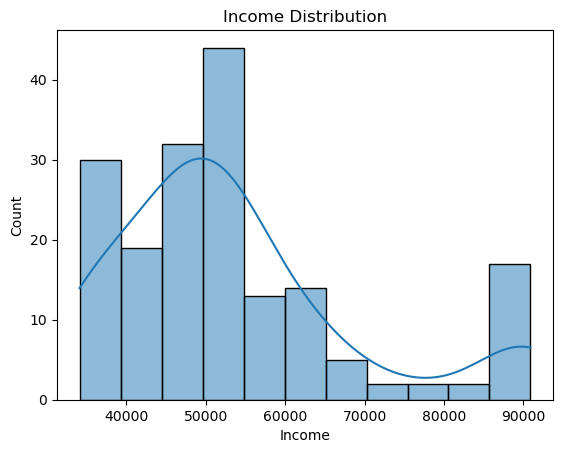

In [298]:
sns.histplot(df['Income'],kde=True)
plt.title("Income Distribution")
plt.show()

In [119]:
#Creating Income groups

In [133]:
df['IncomeGroup'] = pd.qcut(df['Income'], q=3, labels=['Low', 'Medium', 'High'])

In [134]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Group,IncomeGroup
0,KP281,20,Male,14,Single,3,4,34109,112,20-25,Low
1,KP281,20,Male,15,Single,2,3,34109,75,20-25,Low
2,KP281,20,Female,14,Partnered,4,3,34109,66,20-25,Low
3,KP281,20,Male,14,Single,3,3,34109,85,20-25,Low
4,KP281,20,Male,14,Partnered,4,2,35247,47,20-25,Low


In [135]:
df['Income']=df['Income'].astype('int')

In [136]:
df['IncomeGroup'].value_counts()

IncomeGroup
Low       63
Medium    62
High      55
Name: count, dtype: int64

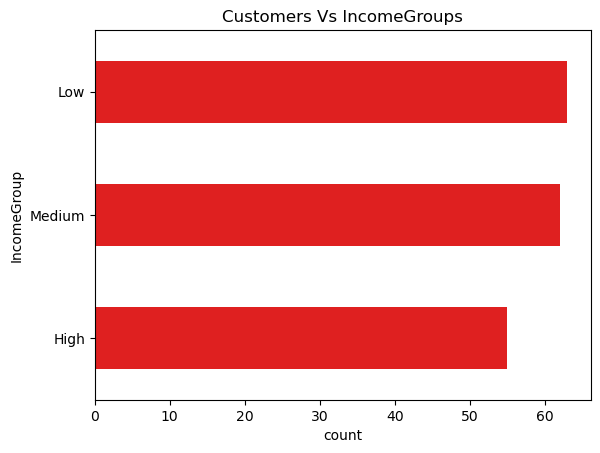

In [137]:
sns.countplot(df['IncomeGroup'], color ='red',width = 0.5)
plt.title('Customers Vs IncomeGroups')
plt.show()

**Fitness**

In [301]:
fitness_data = df['Fitness'].value_counts().sort_values(ascending=False)
fitness_data

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

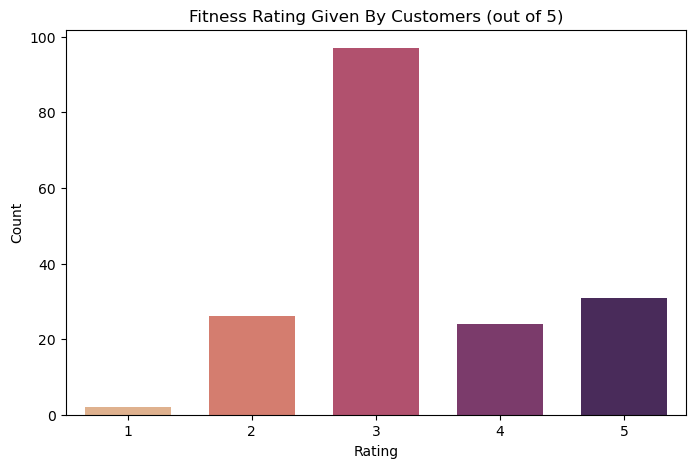

In [302]:
plt.figure(figsize=(8,5))
sns.barplot(x=fitness_data.index, y=fitness_data.values, hue = fitness_data.index, legend=False, palette = 'flare' ,width=0.7)
plt.title("Fitness Rating Given By Customers (out of 5)")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.show()

1---> Bad

2---> Below Average

3---> Average/Good

4---> Very Good

5---> Excellent Shape

***--> Most of customers (54%) rated themselves as Average/Good***

***--> Around 18% customers rated themselves as in excellent shape.***

**Miles**

In [142]:
miles_count = df['Miles'].value_counts()
top3_miles_count=miles_count.head(3)

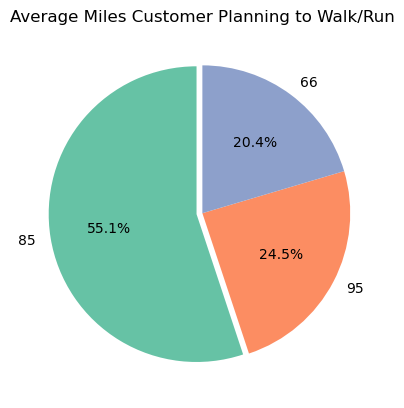

In [143]:
explode = (0.04, 0, 0)
colors = sns.color_palette('Set2')[0:len(top3_miles_count.index)]
plt.pie(top3_miles_count, labels = top3_miles_count.index,autopct='%1.1f%%',startangle=90, colors=colors,explode=explode)
plt.title('Average Miles Customer Planning to Walk/Run',y=1.0,pad=5)
plt.show()

***--> 80% of the customers prefer to walk/run 85-95 miles per week***

**<span style="font-size: 23px;">BIVARIATE ANALYSIS</span>**

**<span style="font-size: 20px;">KP281</span>**

**probability of buying KP281**

In [144]:
df['Product'].value_counts(normalize=True).round(2)

Product
KP281    0.44
KP481    0.33
KP781    0.22
Name: proportion, dtype: float64

***44% chance of buying KP281***

**KP281 Vs Marital Status**

In [145]:
kp_281 = df.groupby('Product',observed=False)['MaritalStatus'].value_counts().loc['KP281'].reset_index()
kp_281

,MaritalStatus,count
0,Partnered,48
1,Single,32


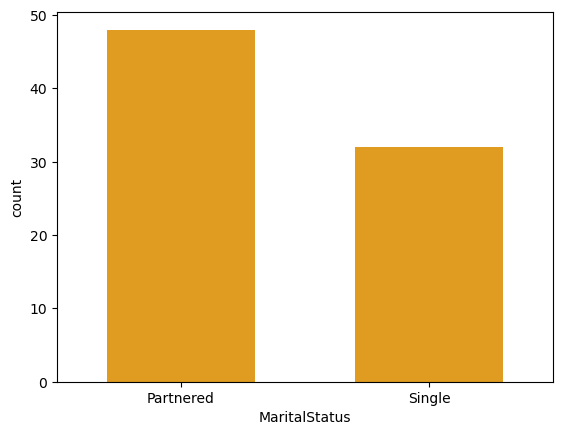

In [146]:
sns.barplot(x=kp_281['MaritalStatus'],y=kp_281['count'],color = 'orange',width=0.6)
plt.show()

***Partnered customers prefer to buy this product than customer who is single.***

**<span style="font-size: 15px;">Given a customers' marital status, what is chance of buying the product -- P(KP281|MaritalStatus)</span>**

In [148]:
kp_281 = pd.crosstab(index=df['MaritalStatus'],columns=df['Product']=='KP281',normalize=True,margins=True).round(3)
# kp_normalized.columns.name=None
# kp281 = kp_normalized.reset_index()
kp_281

Product,False,True,All
MaritalStatus,,,
Partnered,0.328,0.267,0.594
Single,0.228,0.178,0.406
All,0.556,0.444,1.000


***44% chance***

***P(KP281|MaritalStatus) = P(KP281),so marital status and buying KP281 are independent events and do not have any affect on each others probability.***

**<span style="font-size: 15px;">Given a customers' marital status and his income, what is chance of buying the product -- P(KP281|MaritalStatus&Income)</span>**

In [149]:
mar_status_inc = pd.crosstab(index=[df['MaritalStatus'], df['IncomeGroup']],columns=df['Product']=='KP281',normalize='index',margins=True).round(3)
mar_status_inc

Product                    False   True
MaritalStatus IncomeGroup              
Partnered     Low          0.394  0.606
              Medium       0.459  0.541
              High         0.784  0.216
Single        Low          0.367  0.633
              Medium       0.600  0.400
              High         0.833  0.167
All                        0.556  0.444

***partnered and low income group -  60% chance of buying.***

***partnered and medium income group -  54% chance of buying.***

***single and low income group -  63% chance of buying.***

***single and medium income group -  40% chance of buying.***

**KP281 Vs Age Groups**

In [270]:
kp281_age = pd.crosstab(index=df['Product'], columns=df['Age Group']).loc['KP281']
kp281_df = kp281_age.sort_values(ascending=False)
kp281_df

Age Group
20-25    27
25-30    26
30-35    10
35-40    10
40-45     7
Name: KP281, dtype: int64

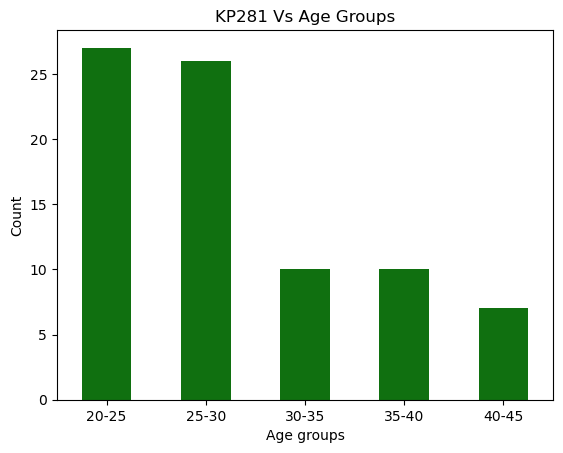

In [272]:
sns.barplot(kp281_df,color = 'green', width = 0.5)
plt.title("KP281 Vs Age Groups")
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.show()

***This product is mainly prefered by customers of age between 20-30***

**KP281 Vs Education**

In [285]:
kp281_education = pd.crosstab(index=df['Product'], columns=df['Education']).loc['KP281']
kp281_df = kp281_education.to_frame()
kp281_df

,KP281
Education,
14,35
15,4
16,39
18,2


***Most customers buying this product has 16 years of education***

**KP281 Vs IncomeGroups**

**<span style="font-size: 15px;">Given a customers income, what is chance of buying the product -- P(KP281|Income)</span>**

In [273]:
kp281_income = pd.crosstab(index=df['Product'], columns=df['IncomeGroup']).loc['KP281']
kp281_df = kp281_income.to_frame().T
kp281_df

IncomeGroup,Low,Medium,High
KP281,39,30,11


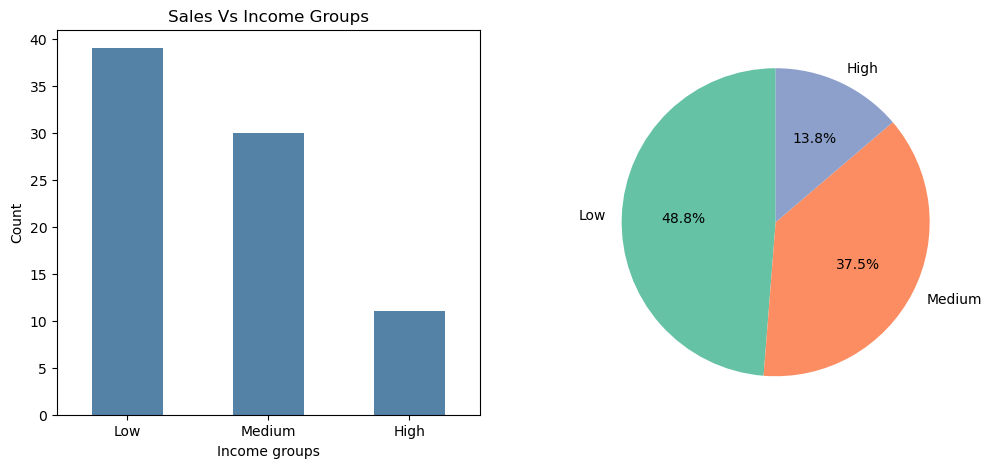

In [151]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(kp281_df,color = 'Steelblue', width = 0.5)
plt.title("Sales Vs Income Groups")
plt.xlabel('Income groups')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(kp281_income, labels = kp281_income.index,autopct='%1.1f%%',startangle=90, colors=colors)
plt.show()

In [152]:
df[df['IncomeGroup']=='Low']['Income'].min() # minimum income in low Income group

34109

In [153]:
df[df['IncomeGroup']=='Low']['Income'].max() # maximum income in low Income group

45480

***People in the Income bracket of 34100 - 45400 mostly brough this item***

**KP281 Vs Usage**

In [155]:
usage_data=pd.crosstab(
                        index=df['Usage'],
                        columns=df['Product']=='KP281',
                        normalize='columns').round(3).sort_values(by=True,ascending=False).head(4)
usage_data

Product,False,True
Usage,,
3,0.32,0.462
4,0.30,0.275
2,0.14,0.238
5,0.15,0.025


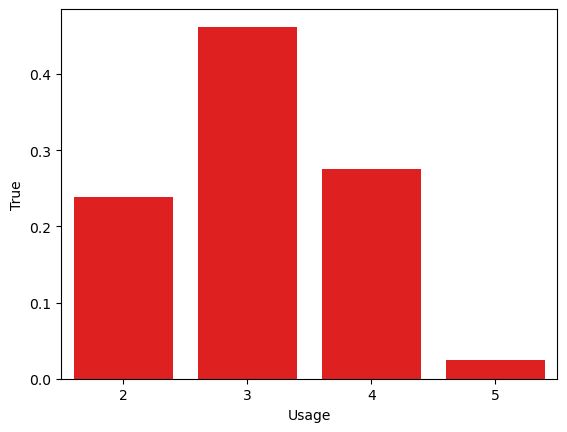

In [156]:
usage_df = usage_data.reset_index()
sns.barplot(data=usage_df, x=usage_df.columns[0], y=usage_df.columns[2],color = 'red')
plt.show()

***Around 74% customers who bought KP281 plans to use the treadmill 3-4 times a week***

**KP281 Vs Gender**

In [158]:
gender_data=pd.crosstab(index=df['Gender'],columns=df['Product']=='KP281').round(3).sort_values(by=True,ascending=False)
gender_data

Product,False,True
Gender,,
Female,36,40
Male,64,40


***There is a 50% chance for males and females to buy this product***

**KP281 Vs Miles**

In [160]:
miles_data=pd.crosstab(index=df['Miles'],columns=df['Product']=='KP281').round(3).sort_values(by=True,ascending=False).head(10)
miles_data.columns.name=None
miles_data.reset_index(inplace=True)
miles_data

,Miles,False,True
0,85,11,16
1,66,0,10
2,75,0,10
3,47,0,9
4,94,0,8
5,113,0,8
6,56,0,6
7,103,0,3
8,38,0,3
9,141,0,2


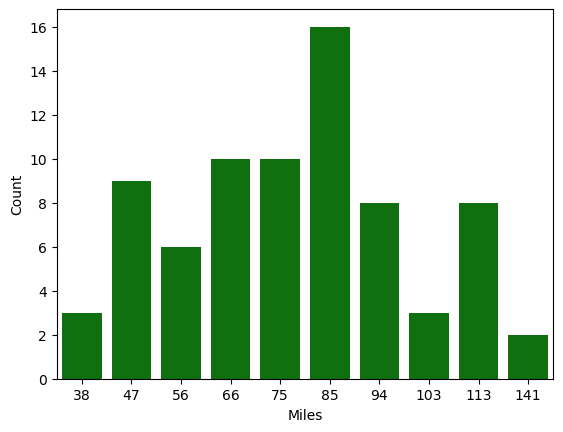

In [161]:
sns.barplot(x=miles_data.loc[:,'Miles'],y=miles_data.loc[:,1],color='green')
plt.ylabel('Count')
plt.show()

***Customers who bought this product are mostly planning to walk/run 45-85 miles per week.***

**KP281 Vs Fitness**

In [163]:
fitness_data=pd.crosstab(index=df['Fitness'],columns=df['Product']=='KP281').round(3).sort_values(by=True,ascending=False).head(4)
fitness_data.columns.name=None
fitness_data.reset_index(inplace=True)

In [164]:
fitness_data

,Fitness,False,True
0,3,43,54
1,2,12,14
2,4,15,9
3,5,29,2


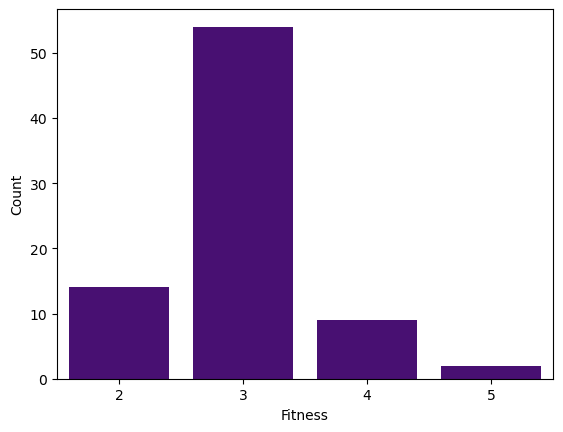

In [166]:
sns.barplot(x=fitness_data.loc[:,'Fitness'],y=fitness_data.loc[:,1],color='indigo')
plt.ylabel('Count')
plt.show()

***Customers who bought this product are mostly those who rated their fitness as average/good.***

***<span style="font-size: 20px;">Customer profile for KP281</span>***

o--> This is the most prefered equipment by ***low & medium income groups*** due to its low price compared to other two treadmills.

o--> Customers of age betwween ***20-30 mostly***prefer this product

o--> Single customers with ***low income*** have larger probability of buying this product than customers who are partnered. 

o--> These customers are ***casual users*** who may use this equipment 3-4 times a week or walk/run 45-84 miles per week.

o--> These customers ***are not fitness freaks*** as most of them rated themselves average/good.

o--> Both male and females ***equally prefer*** this equipment.

o--> Most of the Customers buying this product has ***16 years of eduation.***

#### **<span style="font-size: 20px;">KP481</span>**

**probability of buying KP481**

In [167]:
(df['Product']=='KP481').value_counts(normalize=True).round(2)

Product
False    0.67
True     0.33
Name: proportion, dtype: float64

***33% chance of buying KP481***

**KP481 Vs Marital Status**

**<span style="font-size: 15px;">Given a customers' marital status, what is chance of buying the product -- P(KP481|MaritalStatus)</span>**

In [168]:
kp_normalized = pd.crosstab(index=df['MaritalStatus'],columns=df['Product']=='KP481',normalize=True,margins=True).round(3)
kp_normalized 

Product,False,True,All
MaritalStatus,,,
Partnered,0.394,0.200,0.594
Single,0.272,0.133,0.406
All,0.667,0.333,1.000


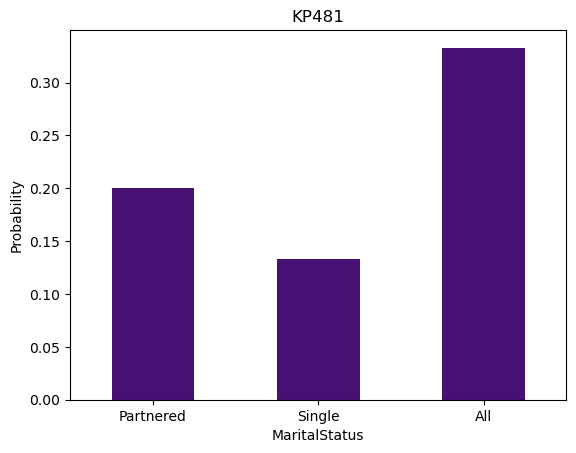

In [169]:
sns.barplot(kp_normalized .iloc[0:3,1],color = 'indigo',width = 0.5)
plt.title('KP481')
plt.ylabel('Probability')
plt.show()

***<span style="font-size: 14px;">Given marital status there is 33% chance that the person will buy KP481 which is equal to the individual probability of buying KP481. So both these events are independent events </span>***

**KP481 Vs Age Groups**

In [275]:
kp481_age = pd.crosstab(index=df['Product'], columns=df['Age Group']).loc['KP481']
kp481_df = kp481_age.sort_values(ascending=False)
kp481_df

Age Group
20-25    17
25-30    16
30-35    15
35-40     7
40-45     5
Name: KP481, dtype: int64

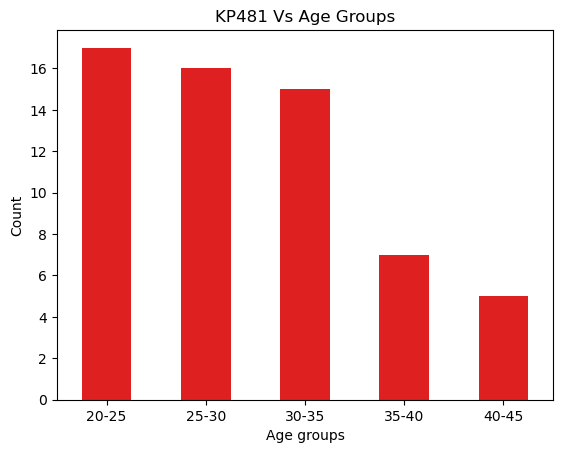

In [276]:
sns.barplot(kp481_df,color = 'red', width = 0.5)
plt.title("KP481 Vs Age Groups")
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.show()

***This product is mainly prefered by customers of age between 20-35***

**KP481 Vs Education**

In [291]:
kp481_education = pd.crosstab(index=df['Product'], columns=df['Education']).loc['KP481']
kp481_df = kp481_education.to_frame()
kp481_df

,KP481
Education,
14,26
15,1
16,31
18,2


***Most Customers buying this product has 16 years of education***

**KP481 Vs Income**

In [278]:
kp481_series = pd.crosstab(index=df['Product'], columns=df['IncomeGroup']).loc['KP481']

kp481_df = kp481_series.to_frame().T
kp481_df

IncomeGroup,Low,Medium,High
KP481,24,24,12


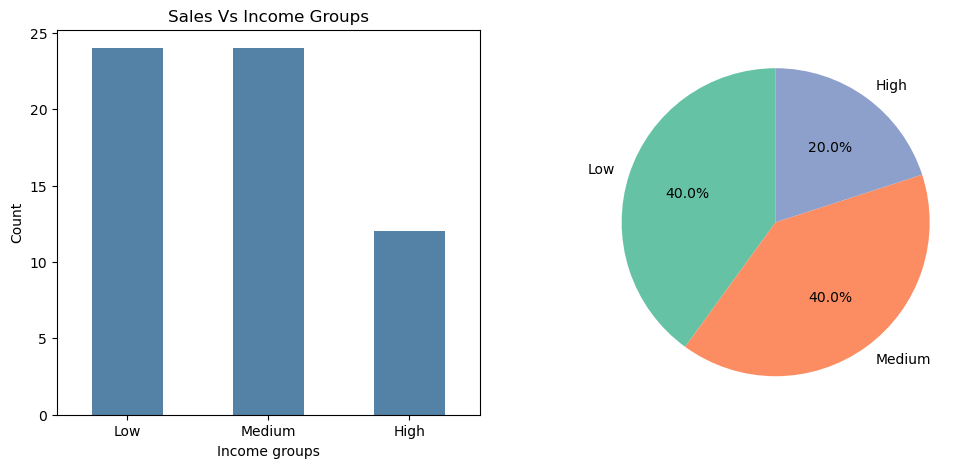

In [171]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(kp481_df,color = 'Steelblue', width = 0.5)
plt.title("Sales Vs Income Groups")
plt.xlabel('Income groups')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(kp481_series, labels = kp481_series.index,autopct='%1.1f%%',startangle=90, colors=colors)
plt.show()

***There is an equal chance of 40% for both low and medium income groups to buy this product***

**KP481 Vs Usage**

In [173]:
usage_data=pd.crosstab(index=df['Usage'],columns=df['Product']=='KP481',normalize='columns').round(3).sort_values(by=True,ascending=False).head(4)
usage_data

Product,False,True
Usage,,
3,0.317,0.517
2,0.158,0.233
4,0.333,0.200
5,0.117,0.050


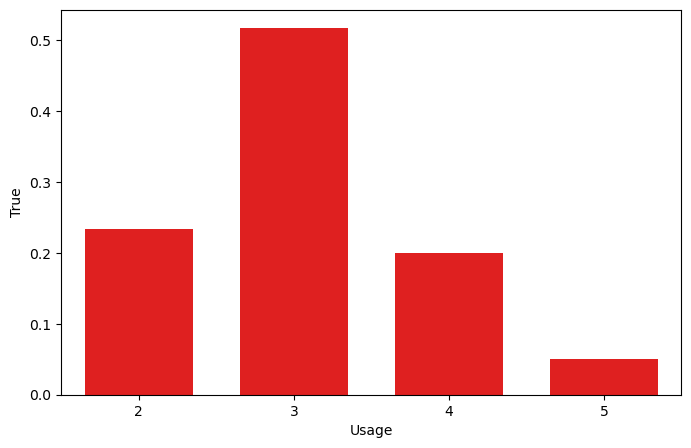

In [179]:
plt.figure(figsize=(8,5))
usage_df = usage_data.reset_index()
sns.barplot(data=usage_df, x=usage_df.columns[0], y=usage_df.columns[2],color = 'red',width=0.7)
plt.show()

***Around 74% customers who bought KP481 plans to use the treadmill 2-3 times a week***

**KP481 Vs Gender**

In [181]:
gender_data=pd.crosstab(index=df['Gender'],columns=df['Product']=='KP481').round(3).sort_values(by=True,ascending=False)
gender_data

Product,False,True
Gender,,
Male,73,31
Female,47,29


***Out of 180 customers There is a 31% chance for males and 29% for females to buy this product***

**KP481 Vs Miles**

In [183]:
miles_data=pd.crosstab(index=df['Miles'],columns=df['Product']=='KP481').round(3).sort_values(by=True,ascending=False).head(10)
miles_data.columns.name=None
miles_data.sort_values(by=True,ascending=False)

,False,True
Miles,,
95,0,12
85,16,11
106,1,8
53,0,7
64,0,6
127,0,5
42,0,4
74,0,3
170,1,2


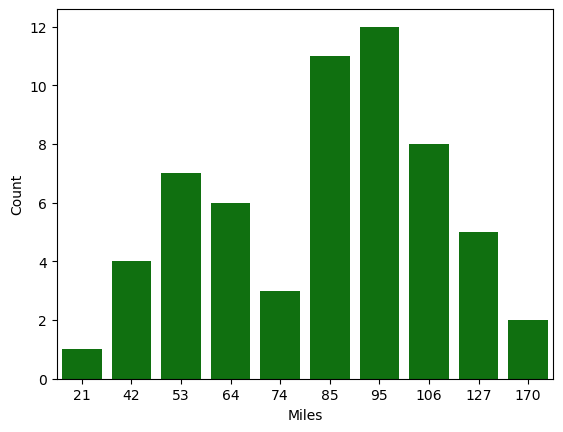

In [184]:
sns.barplot(x=miles_data.index,y=miles_data.iloc[:,1],color='green')
plt.ylabel('Count')
plt.show()

***Customers who bought this product are mostly planning to walk/run 85-105 miles per week.***

**KP481 Vs Fitness**

In [186]:
fitness_data=pd.crosstab(index=df['Fitness'],columns=df['Product']=='KP481').round(3).sort_values(by=True,ascending=False).head(4)
fitness_data.columns.name=None
fitness_data.reset_index(inplace=True)

In [187]:
fitness_data

,Fitness,False,True
0,3,58,39
1,2,14,12
2,4,16,8
3,1,1,1


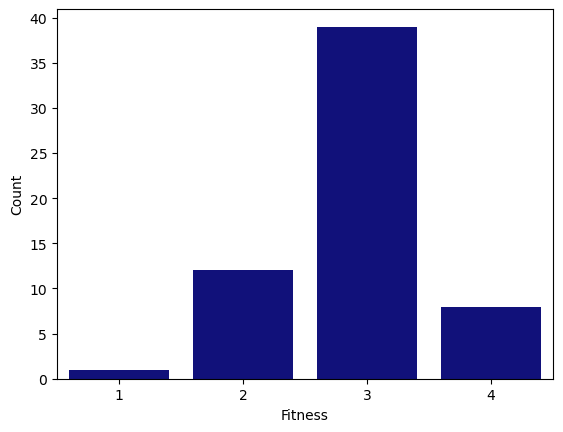

In [189]:
sns.barplot(x=fitness_data.loc[:,'Fitness'],y=fitness_data.loc[:,1],color='darkblue')
plt.ylabel('Count')
plt.show()

***Customers who bought this product are mostly those who rated their fitness as average/good.***

**<span style="font-size: 15px;">Given a customers' marital status and his income, what is chance of buying the product -- P(KP481|MaritalStatus&Income)</span>**

In [193]:
mar_status_inc = pd.crosstab(index=[df['MaritalStatus'], df['IncomeGroup']],columns=df['Product']=='KP481',normalize='index',margins=True).round(3)
mar_status_inc

Product                    False   True
MaritalStatus IncomeGroup              
Partnered     Low          0.606  0.394
              Medium       0.568  0.432
              High         0.811  0.189
Single        Low          0.633  0.367
              Medium       0.680  0.320
              High         0.722  0.278
All                        0.667  0.333

***partnered and low income group -  39% chance of buying.***

***partnered and medium income group -  43% chance of buying.***

***single and low income group -  36% chance of buying.***

***single and medium income group -  32% chance of buying.***

***<span style="font-size: 20px;">Customer profile for KP481</span>***

o--> This equipment is equally preferred by ***low & medium income groups*** due to its comparative price.

o--> Most customers buying this product are of the ***age between 20-35.***

o--> These customers may use this equipment ***2-3 times a week*** or ***walk/run 85-105 miles per week***.

o--> These customers are not fitness freaks as most of them ***rated themselves average/good.***

o--> Both male and females almost ***equally prefer this equipment.***

o--> Most of the customers buying this product has ***16 years of education.***

#### **<span style="font-size: 20px;">KP781</span>**

**probability of buying KP781**

In [194]:
(df['Product']=='KP781').value_counts(normalize=True).round(2)

Product
False    0.78
True     0.22
Name: proportion, dtype: float64

***22% chance of buying KP781***

**KP781 Vs Marital Status**

In [200]:
kp_781 = pd.crosstab(index=df['MaritalStatus'],columns=df['Product']=='KP781',normalize=True,margins=True).round(3)
kp_normalized.columns.name=None
kp_781

Product,False,True,All
MaritalStatus,,,
Partnered,0.467,0.128,0.594
Single,0.311,0.094,0.406
All,0.778,0.222,1.000


***22% of chance that the customer will buy KP781 given his marital status which is same as individual probability of buying KP781***

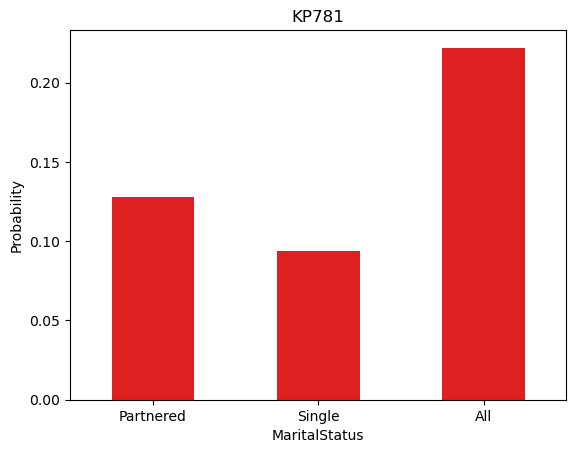

In [210]:
sns.barplot(x=kp_781.index,y=kp_781.iloc[:,1], color = 'red',width = 0.5)
plt.title('KP781')
plt.ylabel('Probability')
plt.show()

***Only 12% chance of buying KP781 given his/her marital status as partnered and 9.4% given his/her marital status as single***

**KP781 Vs Age Groups**

In [279]:
kp781_age = pd.crosstab(index=df['Product'], columns=df['Age Group']).loc['KP781']
kp781_df = kp781_age.sort_values(ascending=False)
kp781_df

Age Group
25-30    17
20-25    10
30-35     6
40-45     5
35-40     2
Name: KP781, dtype: int64

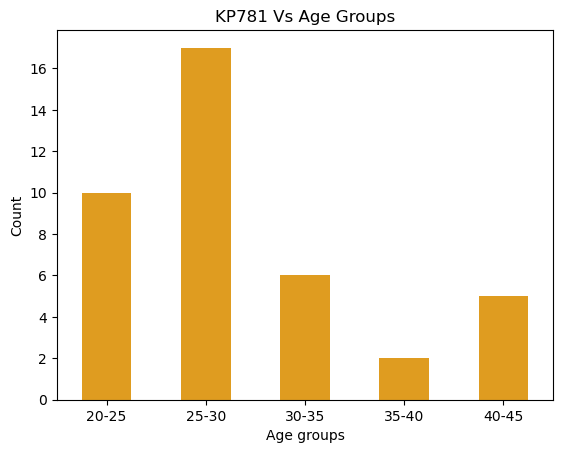

In [280]:
sns.barplot(kp781_df,color = 'orange', width = 0.5)
plt.title("KP781 Vs Age Groups")
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.show()

***Most customers belongs to age group 25-30***

**KP781 Vs Education**

In [289]:
kp781_education = pd.crosstab(index=df['Product'], columns=df['Education']).loc['KP781']
kp781_df = kp781_education.to_frame()
kp781_df

,KP781
Education,
14,2
15,0
16,15
18,23


***Most customers buying this product has 18 years of education***

**KP781 Vs Income**

In [216]:
kp781_series = pd.crosstab(index=df['Product'], columns=df['IncomeGroup']).loc['KP781']

kp781_df = kp481_series.to_frame().T
kp781_df

IncomeGroup,Low,Medium,High
KP781,0,8,32


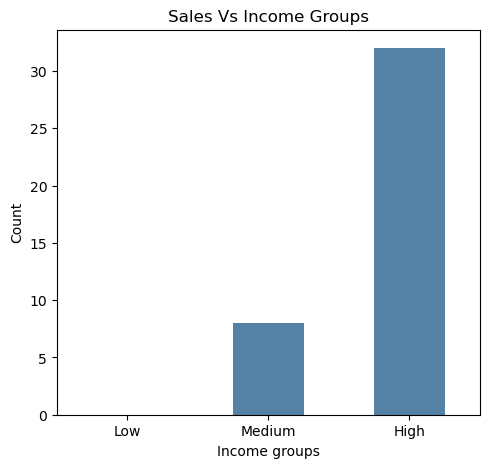

In [229]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(kp781_df,color = 'Steelblue', width = 0.5)
plt.title("Sales Vs Income Groups")
plt.xlabel('Income groups')
plt.ylabel('Count')

plt.show()

***---> There is zero probability for low income groups to buy this product***

***--> This Product is mainly prefered by high income customers***

**KP781 Vs Usage**

In [236]:
usage_data=pd.crosstab(
                        index=df['Usage'],
                        columns=df['Product']=='KP781',
                        normalize='columns',margins=True).round(3).sort_values(by=True,ascending=False).head(4)
usage_data

Product,False,True,All
Usage,,,
4,0.243,0.450,0.289
5,0.036,0.300,0.094
6,0.000,0.175,0.039
7,0.000,0.050,0.011


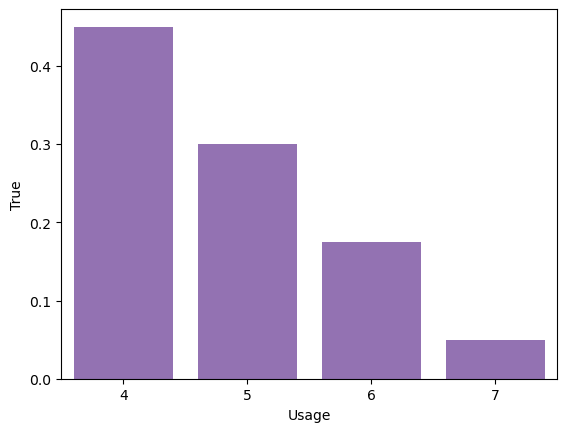

In [237]:
usage_df = usage_data.reset_index()
sns.barplot(data=usage_df, x=usage_df.columns[0], y=usage_df.columns[2],color = 'C4')
plt.show()

***Customers buying this product plans to use the product 4-7 times a week***

**KP781 Vs Gender**

In [238]:
gender_data=pd.crosstab(index=df['Gender'],columns=df['Product']=='KP781').round(3).sort_values(by=True,ascending=False)
gender_data

Product,False,True
Gender,,
Male,71,33
Female,69,7


***82% of the customers who bought this product are males***

**KP781 Vs Miles**

In [303]:
miles_data=pd.crosstab(index=df['Miles'],columns=df['Product']=='KP781').round(3).sort_values(by=True,ascending=False).head(10)
miles_data.columns.name=None
miles_data.reset_index(inplace=True)
miles_data

,Miles,False,True
0,100,0,7
1,180,0,6
2,200,0,6
3,160,0,5
4,150,0,4
5,120,0,3
6,140,0,1
7,280,0,1
8,170,2,1
9,360,0,1


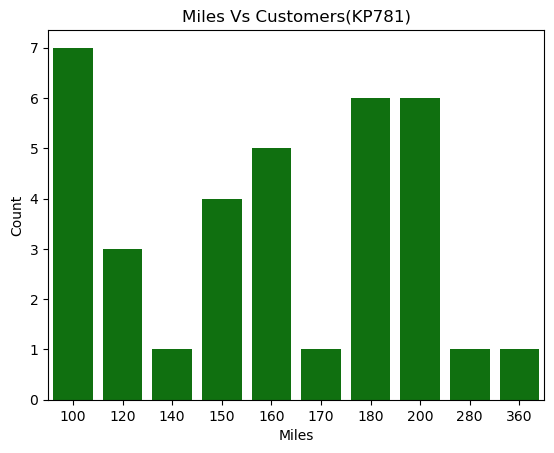

In [304]:
sns.barplot(x=miles_data.loc[:,'Miles'],y=miles_data.loc[:,1],color='green')
plt.ylabel('Count')
plt.title('Miles Vs Customers(KP781)')
plt.show()

***Customers who bought this product are mostly planning to walk/run 100-200 miles per week, some planning even 280-360 miles***

**KP781 Vs Fitness**

In [246]:
fitness_data=pd.crosstab(index=df['Fitness'],columns=df['Product']=='KP781').round(3).sort_values(by=True,ascending=False).head(4)
fitness_data.columns.name=None
fitness_data.reset_index(inplace=True)
fitness_data

,Fitness,False,True
0,5,2,29
1,4,17,7
2,3,93,4
3,1,2,0


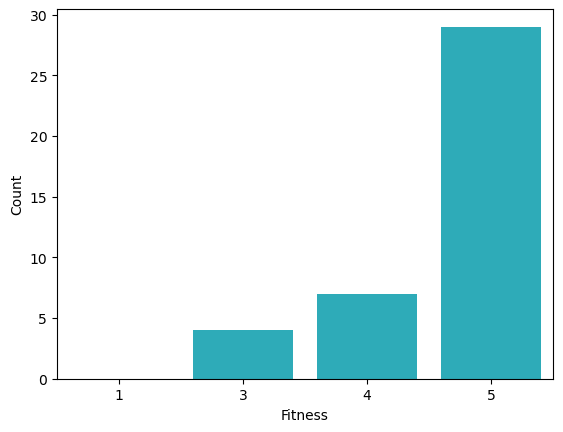

In [251]:
sns.barplot(x=fitness_data.loc[:,'Fitness'],y=fitness_data.loc[:,1],color='C9')
plt.ylabel('Count')
plt.show()

***Customers who bought this product are mostly those who rated their fitness as excellent shape.***

**<span style="font-size: 15px;">Given a customers' marital status, what is chance of buying the product -- P(K781|MaritalStatus)</span>**

In [253]:
mar_status_inc = pd.crosstab(index=df['MaritalStatus'],columns=df['Product']=='KP781',normalize='index',margins=True).round(3)
mar_status_inc

Product,False,True
MaritalStatus,,
Partnered,0.785,0.215
Single,0.767,0.233
All,0.778,0.222


***no major difference***

**<span style="font-size: 15px;">Given a customers' marital status and his income, what is chance of buying the product -- P(KP781|MaritalStatus&Income)</span>**

In [256]:
mar_status_inc = pd.crosstab(index=[df['MaritalStatus'], df['IncomeGroup']],columns=df['Product']=='KP781',normalize='index',margins=True).round(3)
mar_status_inc

Product                    False   True
MaritalStatus IncomeGroup              
Partnered     Low          1.000  0.000
              Medium       0.973  0.027
              High         0.405  0.595
Single        Low          1.000  0.000
              Medium       0.720  0.280
              High         0.444  0.556
All                        0.778  0.222

***partnered and low income group -  0% chance of buying.***

***partnered and medium income group -  2.7% chance of buying.***

***partnered and high income group -  59.5% chance of buying.***



***single and low income group -  0% chance of buying.***

***single and medium income group -  28% chance of buying.***

***partnered and high income group -  55.6% chance of buying.***

***<span style="font-size: 20px;">Customer profile for KP781</span>***

o--> This equipment is largely preferred by ***high income groups*** due to its price.

o--> Most of the customers belongs to ***age group 25-30.***

o--> These customers may use this equipment ***4-7 times a week*** or ***walk/run 100-200 miles per week***.

o--> These customers ***are fitness freaks*** as most of them ***rated themselves as in excellent shape***

o--> Mostly male customers ***prefer this equipment.***

o--> Customers buying this product are mostly highly educated with ***18 years of education.***